Author: Amber Camilleri

# Test = UTK;  Train = WIKI

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import errorbar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import numpy as np
import scipy.stats

### Load the Data: `utk_face_predictions.csv`

The labels of each face image is embedded in the file name, formated like `[age]_[gender]_[race]_[date&time].jpg`

`[age]` is an integer from 0 to 116, indicating the age

`[gender]` is either 0 (male) or 1 (female)

`[race]` is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

`[date&time]` is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [2]:
df = pd.read_csv('utk_face_predictions.csv')
df = df.drop(df.columns[[0]], axis=1)
df.columns=['ActualAge','Gender','Race','Date&Time','FileName','PredAge']
df.head()

,ActualAge,Gender,Race,Date&Time,FileName,PredAge
0,100,1,0,20170110183726390,100_1_0_20170110183726390.jpg.chip.jpg,52
1,100,1,2,20170105174847679,100_1_2_20170105174847679.jpg.chip.jpg,39
2,101,1,2,20170105174739309,101_1_2_20170105174739309.jpg.chip.jpg,37
3,10,0,0,20161220222308131,10_0_0_20161220222308131.jpg.chip.jpg,30
4,10,0,0,20170103200329407,10_0_0_20170103200329407.jpg.chip.jpg,30


In [3]:
df.Race.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Label Race

In [4]:
def label_race (i):
    if i==0: return 'White'
    elif i==1: return 'Black'
    elif i==2: return 'Asian'
    elif i==3: return 'Indian'
    elif i==4: return 'Others'
    else: return

In [5]:
df['Race'] =df['Race'].apply(label_race)

### Label Gender

In [6]:
def label_gender (i):
    if i==0: return 'Male'
    elif i==1: return 'Female'
    else: return
    
    
df['Gender'] =df['Gender'].apply(label_gender)

In [7]:
df.head()

,ActualAge,Gender,Race,Date&Time,FileName,PredAge
0,100,Female,White,20170110183726390,100_1_0_20170110183726390.jpg.chip.jpg,52
1,100,Female,Asian,20170105174847679,100_1_2_20170105174847679.jpg.chip.jpg,39
2,101,Female,Asian,20170105174739309,101_1_2_20170105174739309.jpg.chip.jpg,37
3,10,Male,White,20161220222308131,10_0_0_20161220222308131.jpg.chip.jpg,30
4,10,Male,White,20170103200329407,10_0_0_20170103200329407.jpg.chip.jpg,30


# Plot % Accuracy

### By Race

In [8]:
# Find the Total Number of Data Available for Each Race
df2 = pd.DataFrame(df['Race'].value_counts())
df2.reset_index(inplace=True)
df2.columns = ['Race','Group_Count']
print(df2)

     Race  Group_Count
0   White         5265
1   Asian         1553
2  Indian         1452
3  Others         1103
4   Black          405


In [9]:
# Count the Number Correctly Classified 
def correct_pred (row):
    if row['ActualAge'] == row['PredAge']: return 1
    else: return 0

In [10]:
df['Correct_Age'] =df.apply (lambda row: correct_pred (row),axis=1)

In [11]:
# Find the Ratio of Number Correct / Total
tp = pd.DataFrame(df.groupby(['Race'])['Correct_Age'].sum()) #Number Correct
df3 = df2.merge(tp, on = 'Race') #Merge
df3['Per_Correct'] = (df3['Correct_Age']*100) / df3['Group_Count'] #Take Ratio
df3.sort_values('Per_Correct', ascending=False, inplace=True) #Sort
print(df3)

     Race  Group_Count  Correct_Age  Per_Correct
3  Others         1103           30     2.719855
2  Indian         1452           33     2.272727
1   Asian         1553           29     1.867354
0   White         5265           61     1.158594
4   Black          405            2     0.493827


Text(0, 0.5, '% Accuracy')

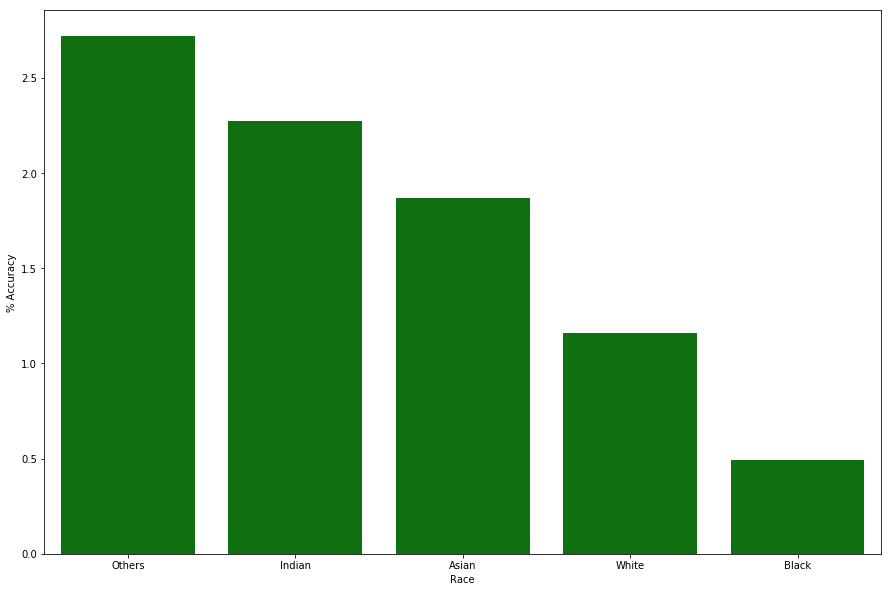

In [12]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(x='Race', y='Per_Correct', color='green', data=df3)
# df3.plot(kind='bar', x='Race', y='Per_Correct',color='green', legend=False)
plt.xlabel('Race')
plt.ylabel('% Accuracy')

### By Gender and Race

In [13]:
df9 = pd.DataFrame(df.groupby(['Race'])['Gender'].value_counts())
# df9.reset_index(inplace=True)
df9.columns = ['Group_Count']

tp9 = pd.DataFrame(df.groupby(['Race','Gender'])['Correct_Age'].sum()) #Number Correct

df10 = df9.merge(tp9, on=['Race','Gender']) #Merge

In [14]:
df10

Group_Count  Correct_Age
Race   Gender                          
Asian  Female          820           19
       Male            733           10
Black  Female          204            1
       Male            201            1
Indian Female          920           25
       Male            532            8
Others Female          648           16
       Male            455           14
White  Female         2814           38
       Male           2451           23

In [15]:
df10['Per_Correct'] = (df10['Correct_Age']*100) / df10['Group_Count'] #Take Ratio
df11 = df10.reset_index()
df11

,Race,Gender,Group_Count,Correct_Age,Per_Correct
0,Asian,Female,820,19,2.317073
1,Asian,Male,733,10,1.364256
2,Black,Female,204,1,0.490196
3,Black,Male,201,1,0.497512
4,Indian,Female,920,25,2.717391
5,Indian,Male,532,8,1.503759
6,Others,Female,648,16,2.469136
7,Others,Male,455,14,3.076923
8,White,Female,2814,38,1.350391
9,White,Male,2451,23,0.938392


Text(0, 0.5, '% Accuracy')

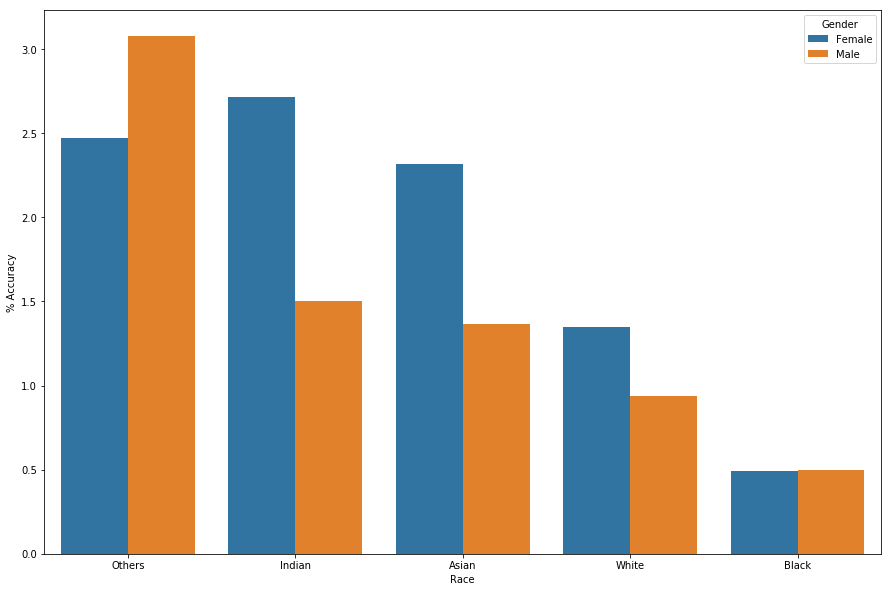

In [16]:
custom_order = ['Others','Indian','Asian','White','Black']

plt.figure(figsize=(15,10))
ax = sns.barplot(x='Race', y='Per_Correct', hue='Gender', data=df11, order=custom_order)
plt.xlabel('Race')
plt.ylabel('% Accuracy')